# <center>PONTIFICIA UNIVERSIDAD CATÓLICA DEL ECUADOR</center>
### <center> PARTE 3: Modelado de datos</center>  
### <center>Trabajo de Titulación: USO DE APRENDIZAJE AUTOMATICO PARA EL ANALISIS DE SENTIMIENTOS A TRAVES DE REVIEWS EN LA UNIVERSIDAD CATOLICA DEL ECUADOR  </center>  

**Tutor: Charles Escobar**  
**Estudiante: Sebastian Miranda**

## Primero vamos a leer los df balanceados y no balanceados ya que vamos a ver cual modelo esta mejor 

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Importamos las librerias

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import re
import matplotlib.pyplot as plt
from textblob import TextBlob

Primero vamos a leer los dos dataframes 

In [24]:
reviews_balanceados = pd.read_csv('reviews_balanceados.csv')
reviews_nobalanceados = pd.read_csv('reviews_nobalanceados.csv')
reviews_nobalanceados = reviews_nobalanceados.dropna(subset=['texto'])
reviews_balanceados = reviews_balanceados.dropna(subset=['texto'])

## No balanceados

Ahora vamos a realizar la division de los datos en datos de prueba y datos de entrenamiento

In [18]:
# Preprocesamiento de datos
vectorizer = TfidfVectorizer(max_features=1000)  # Puedes ajustar el número máximo de características
X = vectorizer.fit_transform(reviews_balanceados['texto'])
y = reviews_balanceados['sentimiento']

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar modelos
models = {
    'Support Vector Machine': SVC(),
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

Entrenando Support Vector Machine...
Métricas de rendimiento para Support Vector Machine:
              precision    recall  f1-score   support

    negativo       0.81      0.97      0.88        63
     neutral       0.92      0.84      0.88        58
    positivo       0.98      0.86      0.92        58

    accuracy                           0.89       179
   macro avg       0.91      0.89      0.89       179
weighted avg       0.90      0.89      0.89       179

Matriz de confusión para Support Vector Machine:


NameError: name 'np' is not defined

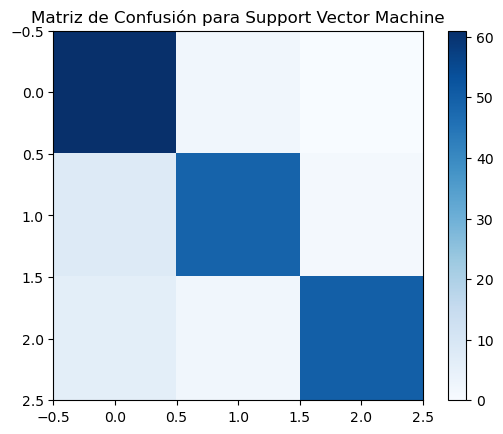

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta verdadera')
    plt.xlabel('Etiqueta predicha')
    plt.tight_layout()

# Entrenamiento y evaluación de modelos
for name, model in models.items():
    print("Entrenando {}...".format(name))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Métricas de rendimiento para {}:".format(name))
    print(classification_report(y_test, y_pred))
    print("Matriz de confusión para {}:".format(name))
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=model.classes_, title='Matriz de Confusión para {}'.format(name))
    plt.show()
    print("----------------------------------------------")

In [14]:
# Preprocesamiento de datos
vectorizer = TfidfVectorizer(max_features=1000)  # Puedes ajustar el número máximo de características
X = vectorizer.fit_transform(reviews_nobalanceados['texto'])
y = reviews_nobalanceados['sentimiento']

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Ahora entrenamos los modelos

In [8]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

AttributeError: 'DataFrame' object has no attribute 'fit'

Primero creamos la funcion para dibujar la matriz de confusion

In [12]:
# Función para mostrar la matriz de confusión con colores
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta verdadera')
    plt.xlabel('Etiqueta predicha')
    plt.tight_layout()


Entrenando Support Vector Machine...
Métricas de rendimiento para Support Vector Machine:
              precision    recall  f1-score   support

    negativo       0.81      0.97      0.88        63
     neutral       0.92      0.84      0.88        58
    positivo       0.98      0.86      0.92        58

    accuracy                           0.89       179
   macro avg       0.91      0.89      0.89       179
weighted avg       0.90      0.89      0.89       179

Matriz de confusión para Support Vector Machine:


NameError: name 'np' is not defined

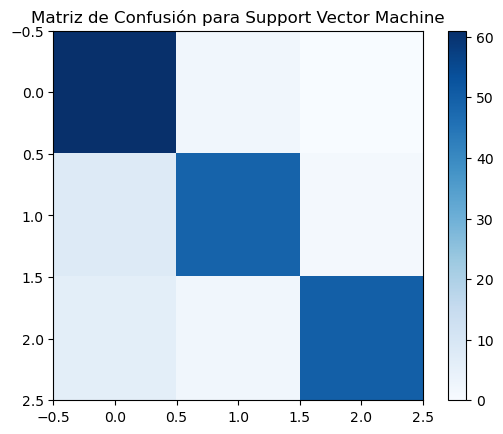

In [13]:
# Inicializar modelos
models = {
    'Support Vector Machine': SVC(),
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}
# Entrenamiento y evaluación de modelos
for name, model in models.items():
    print("Entrenando {}...".format(name))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Métricas de rendimiento para {}:".format(name))
    print(classification_report(y_test, y_pred))
    print("Matriz de confusión para {}:".format(name))
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=model.classes_, title='Matriz de Confusión para {}'.format(name))
    plt.show()
    print("----------------------------------------------")



## Balanceados

Ahora vamos a realizar la division de los datos en datos de prueba y datos de entrenamiento

In [20]:
# Preprocesamiento de datos
vectorizer = TfidfVectorizer(max_features=1000)  # Puedes ajustar el número máximo de características
X = vectorizer.fit_transform(reviews_balanceados['texto'])
y = reviews_balanceados['sentimiento']

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Ahora entrenamos los modelos

In [21]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Entrenando Support Vector Machine...
Métricas de rendimiento para Support Vector Machine:
              precision    recall  f1-score   support

    negativo       0.81      0.97      0.88        63
     neutral       0.92      0.84      0.88        58
    positivo       0.98      0.86      0.92        58

    accuracy                           0.89       179
   macro avg       0.91      0.89      0.89       179
weighted avg       0.90      0.89      0.89       179

Matriz de confusión para Support Vector Machine:


NameError: name 'np' is not defined

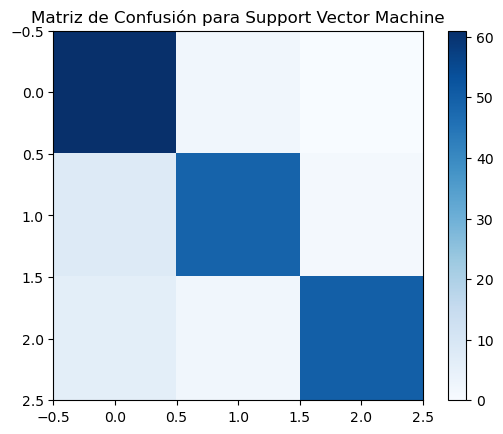

In [22]:

# Entrenamiento y evaluación de modelos
for name, model in models.items():
    print("Entrenando {}...".format(name))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Métricas de rendimiento para {}:".format(name))
    print(classification_report(y_test, y_pred))
    print("Matriz de confusión para {}:".format(name))
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=model.classes_, title='Matriz de Confusión para {}'.format(name))
    plt.show()
    print("----------------------------------------------")


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Cargar el dataframe

# Preprocesamiento de datos
vectorizer = TfidfVectorizer(max_features=1000)  # Puedes ajustar el número máximo de características
X = vectorizer.fit_transform(reviews_nobalanceados['texto'])
y = reviews_nobalanceados['sentimiento']

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar modelos
models_nobalanceado = {
    'Support Vector Machine': SVC(),
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

# Entrenamiento y evaluación de modelos
for name, model in models_nobalanceado.items():
    print("Entrenando {}...".format(name))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Métricas de rendimiento para {}:".format(name))
    print(classification_report(y_test, y_pred))
    print("Matriz de confusión para {}:".format(name))
    print(confusion_matrix(y_test, y_pred))
    print("----------------------------------------------")


Entrenando Support Vector Machine...
Métricas de rendimiento para Support Vector Machine:
              precision    recall  f1-score   support

    negativo       0.88      0.89      0.89        57
     neutral       0.94      0.94      0.94       108
    positivo       0.99      0.99      0.99       287

    accuracy                           0.96       452
   macro avg       0.94      0.94      0.94       452
weighted avg       0.96      0.96      0.96       452

Matriz de confusión para Support Vector Machine:
[[ 51   5   1]
 [  6 101   1]
 [  1   2 284]]
----------------------------------------------
Entrenando Naive Bayes...
Métricas de rendimiento para Naive Bayes:
              precision    recall  f1-score   support

    negativo       0.91      0.68      0.78        57
     neutral       0.93      0.63      0.75       108
    positivo       0.85      1.00      0.92       287

    accuracy                           0.87       452
   macro avg       0.90      0.77      0.82    

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Cargar el dataframe

# Preprocesamiento de datos
vectorizer = TfidfVectorizer(max_features=1000)  # Puedes ajustar el número máximo de características
X = vectorizer.fit_transform(reviews_balanceados['texto'])
y = reviews_balanceados['sentimiento']

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar modelos
models_balanceado = {
    'Support Vector Machine': SVC(),
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

# Entrenamiento y evaluación de modelos
for name, model in models_balanceado.items():
    print("Entrenando {}...".format(name))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Métricas de rendimiento para {}:".format(name))
    print(classification_report(y_test, y_pred))
    print("Matriz de confusión para {}:".format(name))
    print(confusion_matrix(y_test, y_pred))
    print("----------------------------------------------")


Entrenando Support Vector Machine...
Métricas de rendimiento para Support Vector Machine:
              precision    recall  f1-score   support

    negativo       0.81      0.97      0.88        63
     neutral       0.92      0.84      0.88        58
    positivo       0.98      0.86      0.92        58

    accuracy                           0.89       179
   macro avg       0.91      0.89      0.89       179
weighted avg       0.90      0.89      0.89       179

Matriz de confusión para Support Vector Machine:
[[61  2  0]
 [ 8 49  1]
 [ 6  2 50]]
----------------------------------------------
Entrenando Naive Bayes...
Métricas de rendimiento para Naive Bayes:
              precision    recall  f1-score   support

    negativo       0.78      0.97      0.87        63
     neutral       0.93      0.67      0.78        58
    positivo       0.88      0.90      0.89        58

    accuracy                           0.85       179
   macro avg       0.86      0.85      0.84       179
we

In [45]:
# Función para predecir el sentimiento de un nuevo comentario
def predict_sentiment(comment, model, vectorizer):
    # Transformar el comentario usando el mismo vectorizador
    comment_vector = vectorizer.transform([comment])
    # Realizar la predicción
    prediction = model.predict(comment_vector)
    return prediction[0]



In [56]:
# Ejemplo de uso:
nuevo_comentario = "Me excelente bonita esta universidad"  # Reemplaza con el comentario que quieres evaluar

# Selecciona el modelo que deseas usar para la predicción, por ejemplo, el Support Vector Machine
modelo_seleccionado_balanceado = models_balanceado['Support Vector Machine']
modelo_seleccionado_nobalanceado = models_nobalanceado['Random Forest']

# Predice el sentimiento del nuevo comentario
sentimiento_predicho = predict_sentiment(nuevo_comentario, modelo_seleccionado_nobalanceado, vectorizer)
print("El sentimiento del comentario es: {}".format(sentimiento_predicho))

El sentimiento del comentario es: neutral
